# MODULE 18-2: Simple Linear Regression Using OLS Model

## Review Houseprices
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [4]:
house_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [19]:
house_df['salecondition'].index

RangeIndex(start=0, stop=1460, step=1)

In [22]:
house_df['salecondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [37]:
def if_abnormal(salecondition):
      if salecondition == 'Partial':
        return 'abnormal'
      if current == 'AdjLand':
        return 'abnormal'
      if current == 'Alloca':
        return 'abnormal'
      if current == 'Family':
        return 'abnormal'

house_df['salecondition'] == 'if_abnormal'

 #   print (df['salecondition'] = 'Abnormal'

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: salecondition, Length: 1460, dtype: bool

In [35]:
house_df['if_abnormal'].unique()

KeyError: 'if_abnormal'

## Summary Statistics

In [4]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
house_df.mszoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

In [5]:
house_df['bsmtfullbath']

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: bsmtfullbath, Length: 1460, dtype: int64

In [6]:
house_df['centralair']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: centralair, Length: 1460, dtype: object

In [8]:
house_df['street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: street, Length: 1460, dtype: object

## Target Variable: 'SalePrice'
Look at target variable for distribution, and how skewness.

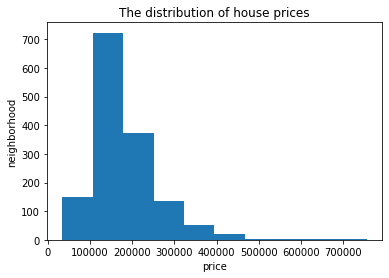

In [9]:
%matplotlib inline

plt.hist(house_df.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("price")
plt.ylabel("neighborhood")
plt.show()

We see that the data are skewed towards the lower price end.

In [10]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

house_df["is_rlzone"] = pd.get_dummies(house_df.mszoning, drop_first=True)
house_df["is_centralair"] = pd.get_dummies(house_df.centralair, drop_first=True)
#house_df["is_normal"] = pd.get_dummies(house_df.salecondition, drop_first=True)

ValueError: Wrong number of items passed 4, placement implies 1

In [6]:
house_df_dummified = pd.get_dummies(house_df, drop_first=True, columns=['salecondition'], prefix='salecondition')

In [13]:
house_df_dummified = pd.get_dummies(house_df_dummified, drop_first=True, columns=['mszoning'], prefix='mszoning')

In [14]:
house_df_dummified.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'woo

In [5]:
pd.get_dummies?

In [51]:
df_with_dummies = pd.get_dummies(house_df, prefix_sep='salecondition_', columns=['salecondition'])

In [44]:
type(house_df) 

pandas.core.frame.DataFrame

In [11]:
house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,is_centralair
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,None,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,None,None,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,4,2008,WD,Abnorml,129900,1
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,1,2008,WD,Normal,118000,1


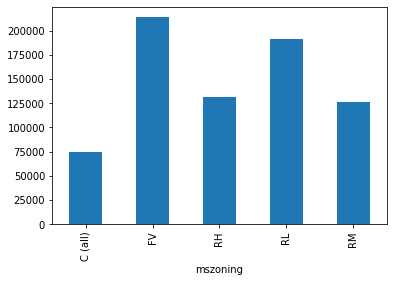

In [17]:
house_df.groupby("mszoning")["saleprice"].mean().plot.bar()

In [20]:
import hvplot.pandas

house_df.groupby("mszoning")["saleprice"].mean().hvplot.bar() + house_df.groupby("centralair")["saleprice"].mean().hvplot.bar() + house_df.groupby("salecondition")["saleprice"].mean().hvplot.bar()

:Layout
   .Bars.Saleprice.I   :Bars   [mszoning]   (saleprice)
   .Bars.Saleprice.II  :Bars   [centralair]   (saleprice)
   .Bars.Saleprice.III :Bars   [salecondition]   (saleprice)

KeyError: 'is_rlzone'

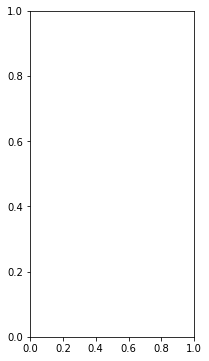

In [15]:
#HV.plot
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.bar(house_df.groupby("mszoning")["saleprice"].mean().index, house_df.groupby("mszoning")["saleprice"].mean(),
      color=("purple","blue"))
plt.title("Average saleprice wrt. zoning")
plt.ylabel("Average saleprice")
plt.xlabel("Is RL Zone?")
plt.xticks([0,1])

plt.subplot(1,3,2)
plt.bar(house_df.groupby("centralair")["saleprice"].mean().index, house_df.groupby("")["saleprice"].mean(),
       color=("red","blue"))
plt.title("Average saleprice wrt. centralair")
plt.ylabel("Average saleprice")
plt.xlabel("Is central air?")
plt.xticks([0,1])

plt.subplot(1,3,3)
plt.bar(house_df.groupby("salecondition")["saleprice"].mean().index, house_df.groupby("")["saleprice"].mean(),
       color=("pink","green"))
plt.title("Average saleprice wrt. sale condition ")
plt.ylabel("Average saleprice")
plt.xlabel("Is normal?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [23]:
columns_to_fit = [x for x in house_df_dummified.columns if 'mszoning' in x or 'salecondition' in x] 

In [24]:
# Y is the target variable
Y = house_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house_df_dummified[columns_to_fit]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-59476.95179673  21815.66507042   3488.48680105  21559.90029216
 110544.70413423  99940.51735703  53013.47017305  99879.47842064
  41578.01642803]

Intercept: 
 63722.4733760946


In [25]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     43.70
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           1.09e-69
Time:                        10:43:07   Log-Likelihood:                -18369.
No. Observations:                1460   AIC:                         3.676e+04
Df Residuals:                    1450   BIC:                         3.681e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.372e+04   2.27e+04      2.803      0.005    1.91e+04    1.08e+05
salecondition_AdjLand -5.948e+04   3.61e+04     -1.649      0.099    -1.3e+05    1.13e+04
salecondition_Alloca   2.182e+04   2.16e+04      1.009      0.313   -2.06e+04    6.42e+04
salecondition_Family   3488.4868   1.74e+04      0.201      0.841   -3.06e+04    3.76e+04
salecondition_Normal   2.156e+04   7437.277      2.899      0.004    6970.927    3.61e+04
salecondition_Partial  1.105e+05   9669.834     11.432      0.000    9.16e+04     1.3e+05
mszoning_FV            9.994e+04   2.44e+04      4.095      0.000    5.21e+04    1.48e+05
mszoning_RH            5.301e+04   2.86e+04      1.853      0.064   -3094.302    1.09e+05
mszoning_RL            9.988e+04   2.28e+04      4.386      0.000    5.52e+04    1.45e+05
mszoning_RM            4.158e+04   2.32e+04      1.795      0.073   -3847.646     8.7e+04
==============================================================================
Omnibus:                      688.430   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5909.752
Skew:                           2.003   Prob(JB):                         0.00
Kurtosis:                      12.006   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PROJECT 18.3

## Project: 
Build a regression model where the target variable is temperature (Y). As explanatory variables (X), use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [53]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [54]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [34]:
weather_df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature',
       'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover',
       'pressure', 'dailysummary'],
      dtype='object')

In [56]:
weather_df.size

1157436

## Assumption One: Linearity of the model in its coefficients


In [59]:
weather_df["X_sq"] = weather_df["humidity"]**2
print(weather_df['X_sq'])

0        0.7921
1        0.7396
2        0.7921
3        0.6889
4        0.6889
          ...  
96448    0.1849
96449    0.2304
96450    0.3136
96451    0.3600
96452    0.3721
Name: X_sq, Length: 96453, dtype: float64


In [42]:
# predictions of the linear regression
predictions = lrm_example.predict(weather_df[["humidity","X_sq"]])

In [57]:
predictions.size

96453

In [58]:
weather_df['humidity'].size

96453

In [38]:
#Insert X (humidity) and X squared and Y (temperature)
lrm_example = linear_model.LinearRegression()
lrm_example.fit(weather_df[["humidity","X_sq"]],weather_df["temperature"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)


Coefficients: 
 [-48.21738959  13.0261315 ]

Intercept: 
 39.834762811055725


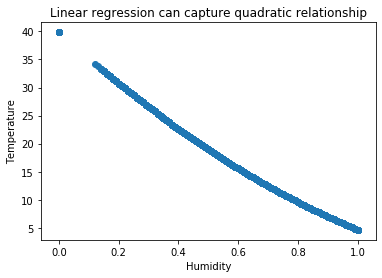

In [61]:
# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(weather_df["humidity"], predictions)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

## Assumption Two: the error term should be zero on average

In [63]:
#Y = temperature
predictions = lrm.predict('humidity')
errors = 'temperature' - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

ValueError: Expected 2D array, got scalar array instead:
array=humidity.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Assumption Three: homoscedasticity
Need the errors from Assumption 2 calculation.

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

## Assumption four: low multicollinearity

In [48]:
weather_df.corr()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,X_sq
temperature,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447,-0.617598
apparenttemperature,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219,-0.589049
humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454,0.989105
windspeed,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263,-0.241460
windbearing,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651,-0.000108
visibility,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818,-0.417818
loudcover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000,0.007337
X_sq,-0.617598,-0.589049,0.989105,-0.241460,-0.000108,-0.417818,NaN,0.007337,1.000000


## Assumption Five: error terms should be uncorrelated with one another

In [49]:
plt.plot(errors)
plt.show()

NameError: name 'errors' is not defined

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

## Assumption Six: features shouldn't be correlated with the errors

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [51]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

NameError: name 'errors' is not defined